In [1]:
# import packages
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [4]:
# read data
training_features_data = pd.read_csv("training_set_features.csv",index_col="respondent_id",
                    sep=',')

test_features_data = pd.read_csv("test_set_features.csv",
                    sep=',')

training_set_labels = pd.read_csv("training_set_labels.csv",index_col="respondent_id",
                    sep=',')

In [5]:
#eliminate null values

#for float types
training_features_data=training_features_data.fillna(training_features_data.mean())

#for string types
training_features_data=training_features_data.fillna('out-of-category')

In [6]:
#check no missing values are left 
training_features_data.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [9]:
#encoding categorical features (str-->float)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [10]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [12]:
#check if data types are correct or not 
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  float64
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [11]:
#check types of test dataset
test_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [12]:
#eliminate null values

#for float types
test_features_data=test_features_data.fillna(test_features_data.mean())

#for string types
test_features_data=test_features_data.fillna('out-of-category')

In [15]:
#check no missing values are left 
test_features_data.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [13]:
#encoding categorical features  (str-->float)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [21]:
#check data types
test_encoded_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  float64
 1   h1n1_concern                 26708 non-null  float64
 2   h1n1_knowledge               26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_h1n1             26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [14]:
print("training_features_data.shape", training_set_labels.shape)
training_set_labels.head()

training_features_data.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [19]:
np.testing.assert_array_equal(training_features_data.index.values, training_set_labels.index.values)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

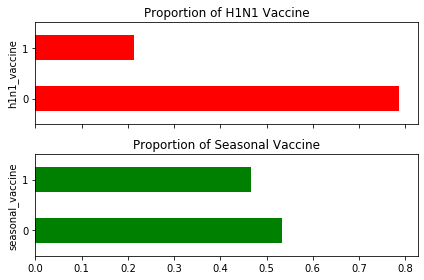

In [22]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = training_set_labels.shape[0]

(training_set_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0], color='red')
)
ax[0].set_ylabel("h1n1_vaccine")

(training_set_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1], color='green')
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [23]:
pd.crosstab(
    training_set_labels["h1n1_vaccine"], 
    training_set_labels["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [24]:
# Phi Coefficient is the same as Pearson for two binary variables
(training_set_labels["h1n1_vaccine"]
     .corr(training_set_labels["seasonal_vaccine"], method="pearson")
)

0.37714265306144673

In [36]:
joined_df = training_features_data.join(training_set_labels)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [25]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

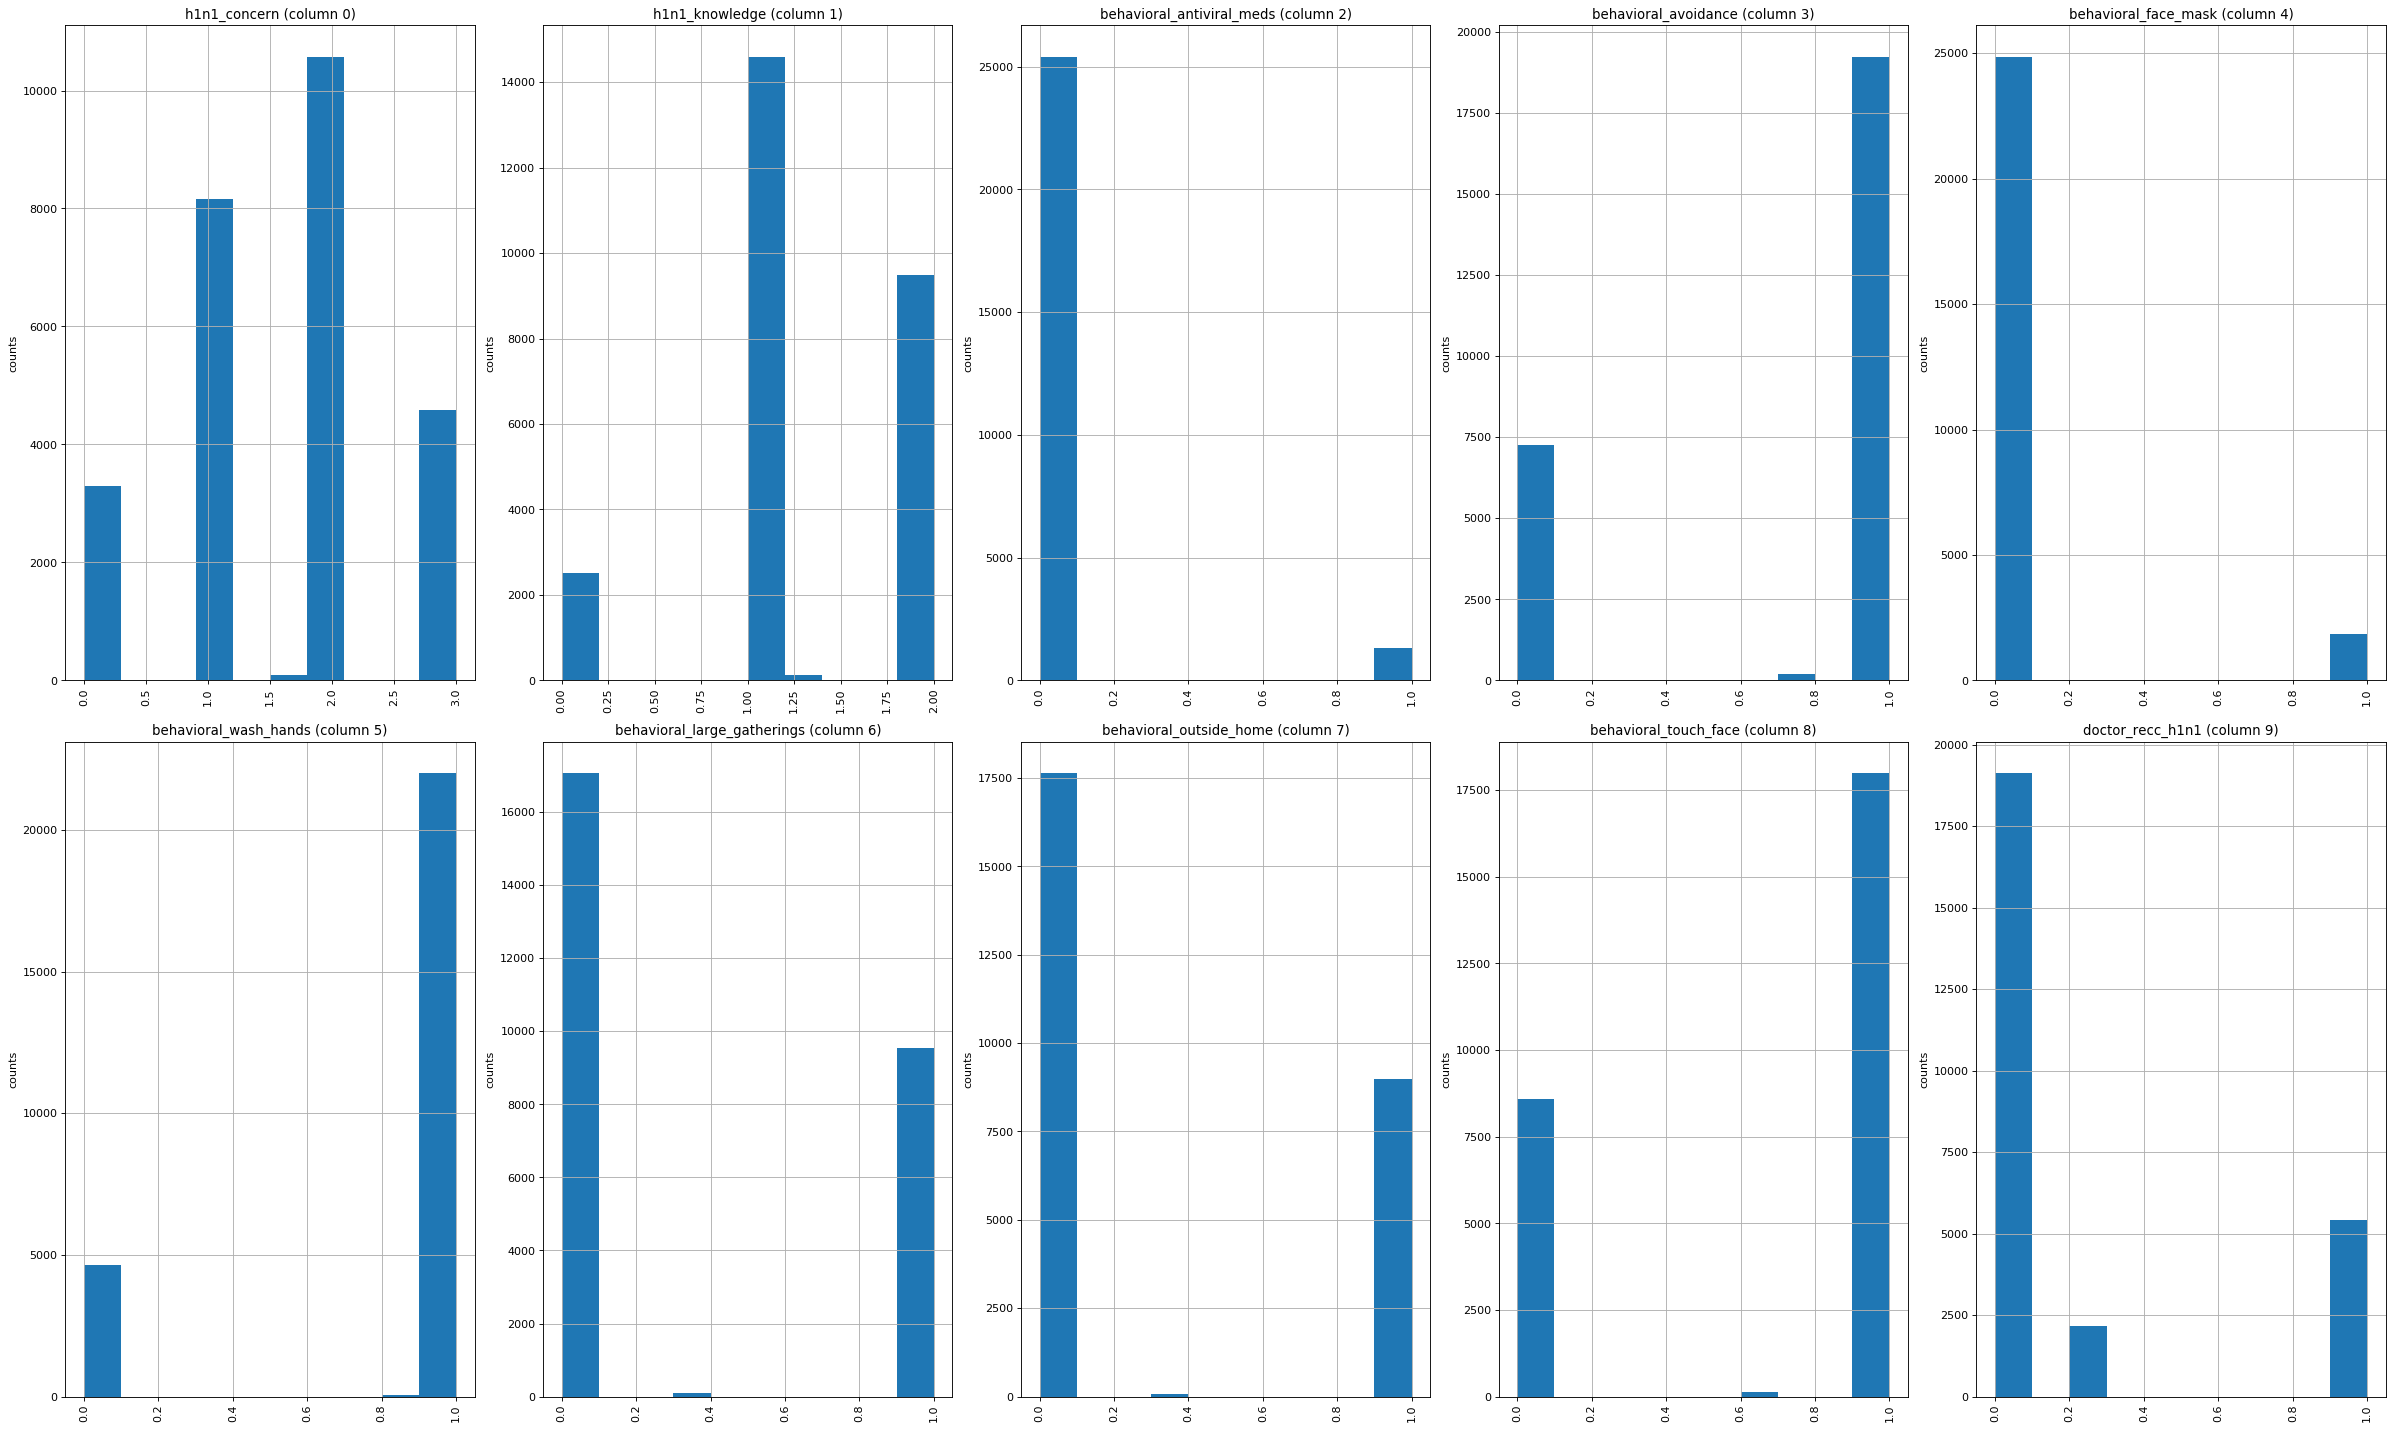

In [16]:

plotPerColumnDistribution(training_features_data, 10, 5)

In [26]:
joined_df = training_features_data.join(training_set_labels)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,out-of-category,out-of-category,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,out-of-category,out-of-category,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [27]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.000000,2849,447
1.000000,6756,1397
1.618486,76,16
2.000000,8102,2473
3.000000,3250,1341


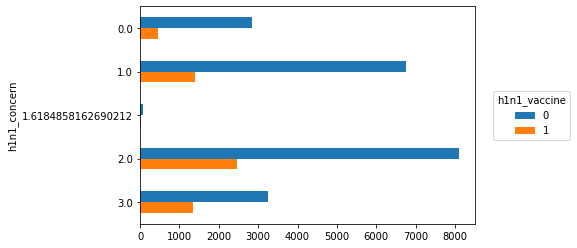

In [25]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [28]:
counts = (joined_df[['h1n1_concern', 'seasonal_vaccine']]
              .groupby(['h1n1_concern', 'seasonal_vaccine'])
              .size()
              .unstack('seasonal_vaccine')
         )
counts

seasonal_vaccine,0,1
h1n1_concern,,
0.000000,2254,1042
1.000000,4811,3342
1.618486,50,42
2.000000,5135,5440
3.000000,2022,2569


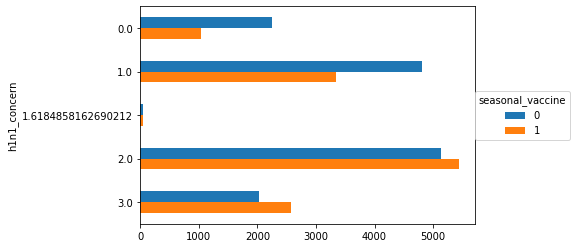

In [24]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='seasonal_vaccine'
)

In [29]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

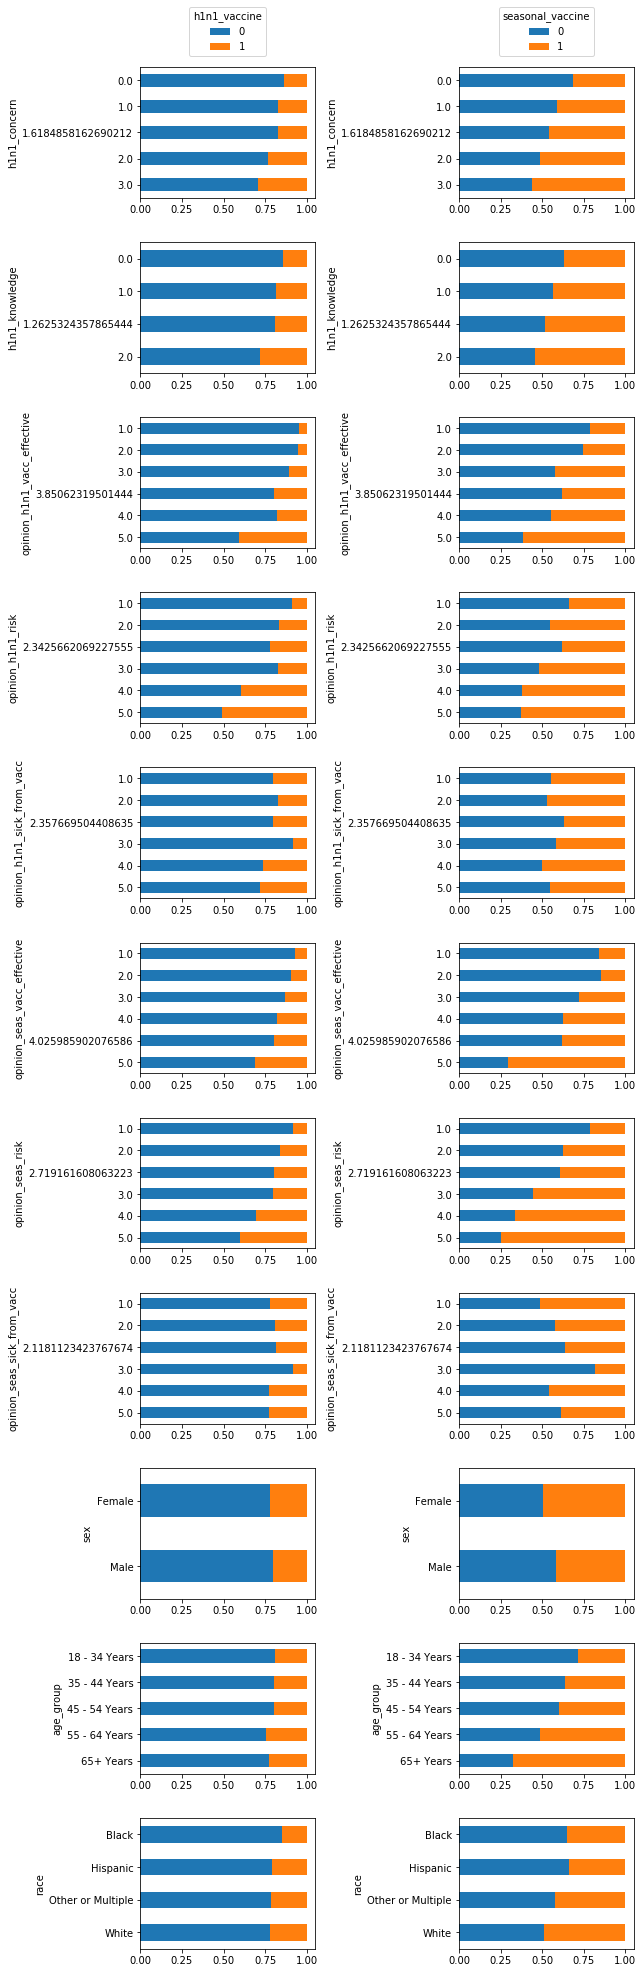

In [26]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()